<a href="https://colab.research.google.com/github/hahmed988/Artificial_Intelligence/blob/master/Regression_and_Permutation_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 - Tabular Regression and Permutation Importance

## Rossmann

Rossmann's Kaggle competition was a business sales prediction competition for $35,000 dollars to the winners.

The premise is that we're given the sales data and information of their stores for the past few years. We need to make a model that can predict the number of sales that will be made in the future.

We can do this through a tabular regression model.

Jeremy walks through feature engineering for this problem, for today though we will download a clean engineered dataset straight from Kaggle. To download it:
1. Go to: https://www.kaggle.com/init27/fastai-v3-rossman-data-clean
2. Go to `output`
3. Right click the download button
4. Click "copy link location" for both train and test
5. `!wget {url}`

(Note: to walk through the feature engineering, see [this](https://github.com/fastai/fastai2/blob/master/nbs/course/rossman_data_clean.ipynb) notebook)

In [0]:
train = 'https://www.kaggleusercontent.com/kf/10297001/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0.._e2IZcTfSmSCCEY2Y0lStw.YlIPSDfZ8B_r8XZ-sepJaB4ykxkOqUuEYrqAqMkuP7C4Asrs3J5zgFqTgv11mPYlp3eTlklXoRvjORpQKKsq7YDM3Zgh_vVDPdE1FffEguazWsHqP0huweiIMT-riv8I3s3Pj_zWzTNASf_r1K3zjylIZENi3rjwDI0X1lDJ4QFFkYcX6SUwRzRJmv1FlJ5sGehopnWlPz79i-PftsIS4YhgoJIlCugUbFoaV8SUOQVN9Jd0ST7-fQ7-VSpUel7ucFYpJTVW6Rev_rx_X9hy4XOjRYS5FNf-9CJ3J4VdNininUCy8lEP2iri5uwsMi-duidobPTqHVyRwTg08BccaRQvy_8YZRtUwiXPLAQemMtbkJLQU5VajaP2wREjib5KnnAr3Ek55c8Ouf2cOnA5nEO4FdlxZu8fgs3DlCVHJsy0gBo13NfWwmIhP1-ocEgzNeO7KfVw4ua8K0Mibwm8RQBGgOPiNmyYFcMOYwuSnMT6_Z1v_GEIArcK3fXNVHGck6HVYprCbuksPDWlRYFW_fnkyVN1VdW2EkT4mjYyMTZh5o-yk_0mfk8De1N1laX41OLaXMvjwA76HKBHhD77RlZ-f4LbXzfpWS6tXLBJZXxDM9TDpCcJVhCUBT4r1V_vDfWUDddmYPUMxb1Qtc2lwZt3cHUErG_s3GRXXX9LhlU.5oSKSWZbeZF5WCX3pZikcQ/train_clean'
test = 'https://www.kaggleusercontent.com/kf/10297001/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..H7cEt3nkiuzXYrLULnLaeA.zzE5x5XpKOiPodSXj4gQXyprlfhEl2AcpsiE1X6MNCIIvbNzet2lNUGzt2bhX_MNWEFZP7Y0XN1UEXdLdtKOpyvtRUmtDOkF82goMFkjkZgLtvJdQXksidCH-MFkj6OzUZECwzYT1G3ioIveqtKjHYV-XXahJU5YclwQKyACPAj0uRdbn7Q0GmW6gx7eMVgtrNFJcnxy1AhyltML3QyXr4I8dP2O_5zwawvVNHOyHE8bKdyb5ia05WMQALLCckNQkY2dd4RAlmFjoSvawf_C7_zZDIhLvSeyD1snw6EvSNRaDv1LpAqJIdKk-Hj6uDfoy64J3lCemSqaVafOjtQVmn4bGlj-3Xs8mp3CtCONe2wEg67yA_uLTHaVBl0lYgWuUfEnwUaIAQGqc1J2-HMzVyzxqjcH5qJ9o80rHiIdt-Tf2iP-CAcp0DfKgHa8MnaY-WkmFBzycerhoLlrLoMcxPEn3ERXuGfzS8sarYMELgVJnl7hvfqIEvVjhNoAtKgek4jSrcVmSTVELQt0WaVEr4d-gtF0eZG24OsS0qkad9uqxu1n1juPBTU3ynnivmSG5fXrJR5foI9HLt9sK83Z9c77OGdr21_RMtD5emIRvQipsHGRaPD8tJkxjXZSlRNt0Fvi6PuQqu4BoXUv7sMlYIy0AN0WwkkqLpPCjwdmQUk.UFrwClfgNJBZ9DbRLN57sQ/test_clean'

In [0]:
!wget {train} -q
!wget {test} -q

And now that we have our data, let's install the `fastai2` library

In [0]:
pip install fastai2

# Time-Series Analysis

In [0]:
from fastai2.tabular.all import *

## The Data:

In [0]:
train_df = pd.read_pickle('train_clean')
test_df = pd.read_pickle('test_clean')

In [0]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
...,...,...,...,...,...
StateHoliday_bw,0,0,0,0,0
Promo_bw,5,5,5,5,5
SchoolHoliday_fw,7,1,5,1,1
StateHoliday_fw,0,0,0,0,0


With our time-series based approach, the feature engineering made a bunch of date-related categorical columns that we can utilize in our **embeddings**.

In [0]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw', 'Promo', 'SchoolHoliday']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday']
   
dep_var = 'Sales'

When doing Regression with these large numbers, we often use the **log** of these values for our `y`'s. Let's transform them real quick:

In [0]:
train_df[dep_var] = np.log(train_df[dep_var])

Now let's declare our `procs`

In [0]:
procs = [FillMissing, Normalize, Categorify]

And splits. Now we want to ensure that (since this is time series) our validation and test 

In [0]:
len(train_df), len(test_df)

(844338, 41088)

In [0]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

Let's find that particular index

In [0]:
train_df['Date'][41393] , train_df['Date'][41395] , train_df['Date'][41396]

(Timestamp('2015-06-19 00:00:00'),
 Timestamp('2015-06-19 00:00:00'),
 Timestamp('2015-06-18 00:00:00'))

In [0]:
idx = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()

In [0]:
idx

41395

So now our `splits` will be every index *after* the 41395'th item

In [0]:
splits = (L(range(idx, len(train_df))),L(range(idx)))

In [0]:
splits

((#802943) [41395,41396,41397,41398,41399,41400,41401,41402,41403,41404...],
 (#41395) [0,1,2,3,4,5,6,7,8,9...])

Let's make our `TabularPandas`! Since we have a large `DataFrame`, we can enable `inplace` to `True` and `reduce_memory` to `True` to save on some storage space (**Note**: `reduce_memory` is by default `True`). To use `inplace`, we need to set `chained_assignment` to `None` in `pandas`

In [0]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022        1837        7560           0        3624       11625
Swap:             0           0           0


In [0]:
pd.options.mode.chained_assignment=None

In [0]:
to = TabularPandas(train_df, procs, cat_vars, cont_vars, dep_var, block_y=RegressionBlock(),
                   splits=splits, inplace=True, reduce_memory=True)

In [0]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022        2811        6585           0        3626       11699
Swap:             0           0           0


And now let's build our `dataloaders`!

In [0]:
dls = to.dataloaders(bs=512)

In [0]:
dls.show_batch()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_fw,StateHoliday_bw,SchoolHoliday_fw,SchoolHoliday_bw,Promo,SchoolHoliday,CompetitionDistance_na,CloudCover_na,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Sales
0,964,3,2015,1,7,False,0,25,a,a,"Feb,May,Aug,Nov",1900,2013,BW,2,Rain,5,3,0,2,0,3,1,0,False,False,270.000150,4.0,1.0,-3.0,100.0,90.000000,78.000000,10.000000,5.000000,5.0,74.0,67.0,0.999998,-86.000002,9.359880
1,702,4,2015,4,2,False,24,25,a,a,"Feb,May,Aug,Nov",2001,2009,BY,14,Rain,2,4,2,0,5,4,1,1,False,False,8550.000027,6.0,3.0,1.0,93.0,80.000000,53.000000,60.999998,36.999999,6.0,72.0,66.0,85.999999,-0.999998,8.699015
2,947,1,2015,4,13,False,13,25,a,a,"Jan,Apr,Jul,Oct",2014,2010,BW,16,#na#,5,1,0,0,0,4,1,0,False,False,459.999930,18.0,12.0,5.0,93.0,61.000001,26.999999,35.000000,11.000000,6.0,82.0,65.0,7.000000,-18.000000,9.149422
3,334,6,2015,3,28,False,24,25,d,c,"Mar,Jun,Sept,Dec",2008,2013,NW,13,Rain,5,0,1,0,5,0,0,0,False,False,4040.000033,12.0,6.0,-2.0,94.0,82.000000,41.000000,27.000000,13.000000,6.0,79.0,75.0,85.999999,-6.000001,8.512382
4,966,4,2014,2,13,False,24,0,a,a,#na#,2008,1900,NW,7,Rain,3,1,0,0,0,0,0,0,False,False,760.000195,7.0,4.0,2.0,93.0,78.000000,60.000000,35.000000,21.000000,6.0,74.0,68.0,43.000000,-63.999999,8.255829
5,777,2,2015,4,7,False,24,25,d,c,"Mar,Jun,Sept,Dec",2004,2013,BW,15,#na#,1,3,0,2,4,5,0,1,False,False,8249.999994,11.0,4.0,-3.0,87.0,54.000000,15.999999,14.000000,6.000000,2.0,72.0,69.0,0.999998,-24.000000,8.364042
6,495,3,2014,8,20,False,0,25,d,a,"Jan,Apr,Jul,Oct",1900,2009,BW,34,#na#,3,3,0,0,5,5,1,1,False,False,5470.000000,18.0,14.0,10.0,88.0,67.000000,38.000000,16.000000,6.000000,4.0,69.0,66.0,62.000001,-44.000000,8.534050
7,683,6,2014,6,14,False,0,0,a,a,#na#,2014,1900,BE,24,Rain-Thunderstorm,5,0,0,1,0,0,0,0,False,False,2850.000105,19.0,16.0,12.0,88.0,70.000000,41.000000,19.000000,11.000000,5.0,62.0,75.0,5.000001,-111.000004,8.650149
8,304,4,2015,4,23,False,0,0,a,a,#na#,2015,1900,"HB,NI",17,Fog,3,1,0,0,0,0,0,0,False,False,1950.000007,13.0,8.0,3.0,100.0,86.000000,47.000000,14.000000,10.000000,6.0,74.0,79.0,16.999999,-7.999999,8.679992
9,727,2,2013,5,14,False,24,0,a,a,#na#,2007,1900,HE,20,#na#,4,2,1,1,0,0,1,0,False,False,2049.999940,18.0,14.0,10.0,94.0,70.000000,42.000000,26.000000,13.000000,6.0,53.0,53.0,5.000001,-6.000001,8.619569


## The Model:


As we're doing regression, we want to dictate what the maximum value to be (and minimum) so we will use a `y_range`

In [0]:
max_log_y = np.max(train_df['Sales'])*1.2

In [0]:
max_log_y

12.7616122408592

And now we can make a `y_range`

In [0]:
y_range = torch.tensor([0, max_log_y]); y_range

tensor([ 0.0000, 12.7616])

Next comes our `Learner`. We'll walk through each step

In [0]:
learn = tabular_learner(dls, layers=[1000,500], ps=[0.001, 0.01],
                       embed_p=0.04, y_range=y_range, metrics=exp_rmspe,
                       loss_func=MSELossFlat())

So we have a lot going on right there. `ps` is overall dropout (helps with overfitting), `embed_p` is dropout on the embedding weights, `exp_rmspe` is Root Mean Square Percentage Error

Let's look at our model:

In [0]:
learn.summary()

TabularModel (Input shape: ['512 x 26', '512 x 14'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            512 x 81             90,396     True      
________________________________________________________________
Embedding            512 x 5              40         True      
________________________________________________________________
Embedding            512 x 3              12         True      
________________________________________________________________
Embedding            512 x 7              91         True      
________________________________________________________________
Embedding            512 x 11             352        True      
________________________________________________________________
Embedding            512 x 3              9          True      
________________________________________________________________
Embedding            512 x 10             260        True      
_____________________________________________

## Training

Now let's fit!

(0.001096478197723627, 0.0003311311302240938)

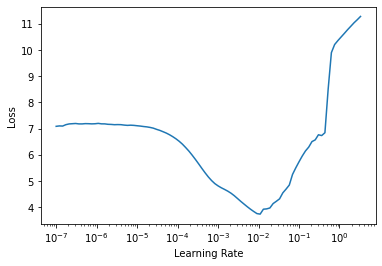

In [0]:
learn.lr_find()

In [0]:
learn.fit_one_cycle(5, 3e-3, wd=0.2)

epoch,train_loss,valid_loss,_exp_rmspe,time
0,0.024755,0.021618,0.155595,00:28
1,0.014523,0.018060,0.128404,00:28
2,0.011341,0.012914,0.116598,00:27
3,0.008629,0.012338,0.111028,00:27
4,0.007297,0.011332,0.108336,00:27


For comparison, an `exp_rmspe` of 0.108 was 10th place

## Inference on a test set:
Now that we have a model, we want to make our final competitions that would be submitted to a competition, as such, we can only make the predictions and submit them as a CSV.

We'll practice bringing in an exported model just to show that you do not need the original data. 

In [0]:
learn.export('myModel')

In [0]:
del learn

In [0]:
learn = load_learner('myModel')

Now we generate our `test_dl` from our `test_df`

In [0]:
dl = learn.dls.test_dl(test_df)

We need to tell the `Learner` to return the predictions for the test set we added

In [0]:
raw_test_preds = learn.get_preds(dl=dl)

Let's take a peek

In [0]:
raw_test_preds

(tensor([[ 8.4058],
         [ 8.9047],
         [ 9.1307],
         ...,
         [ 8.6986],
         [10.0067],
         [ 8.8282]]), None)

You'll notice `[0]` contains our predictions, and `[1]` contains any labels (if we had any). This is nice because if we accidently run `learn.validate()` on a non-labeled test set, we get the following:

In [0]:
learn.validate(dl=dl)

(#2) [None,None]

Still runs, just there are no labels so it's `None`

Now back to our predictions! We need to undo our `log` transform first:

In [0]:
np.exp(raw_test_preds[0])

tensor([[ 4472.7207],
        [ 7366.4399],
        [ 9234.3789],
        ...,
        [ 5994.3242],
        [22174.3809],
        [ 6823.8389]])

In [0]:
test_preds = np.exp(raw_test_preds[0]).numpy().T[0]

(If you want to learn about what `T` does, compare below):

In [0]:
raw_test_preds[0].numpy()

array([[ 8.405752],
       [ 8.90469 ],
       [ 9.130689],
       ...,
       [ 8.698568],
       [10.006693],
       [ 8.828177]], dtype=float32)

In [0]:
test_preds

array([ 4472.7207,  7366.44  ,  9234.379 , ...,  5994.324 , 22174.38  ,
        6823.839 ], dtype=float32)

Now we can submit to Kaggle!

In [0]:
test_df['Sales'] = test_preds
test_df[['Id', "Sales"]] = test_df[['Id', 'Sales']].astype('int')

And finally we make our submission. **NOTE:** remove the index when generating your submission always!

In [0]:
test_df[['Id', 'Sales']].to_csv('submission.csv', index=False)

# Permutation Importance

Permutation importance is a technique in which we shuffle each column in a dataframe and analyze how changing a particular column affected our `y` values. The more that it was affected, the more "important" we can (generally) call a variable in our neural network. Let's build a quick algorithm to do this:

In [0]:
class PermutationImportance():
  "Calculate and plot the permutation importance"
  def __init__(self, learn:Learner, df=None, bs=None):
    "Initialize with a test dataframe, a learner, and a metric"
    self.learn = learn
    self.df = df
    bs = bs if bs is not None else learn.dls.bs
    if self.df is not None:
      self.dl = learn.dls.test_dl(self.df, bs=bs)
    else:
      self.dl = learn.dls[1]
    self.x_names = learn.dls.x_names.filter(lambda x: '_na' not in x)
    self.na = learn.dls.x_names.filter(lambda x: '_na' in x)
    self.y = dls.y_names
    self.results = self.calc_feat_importance()
    self.plot_importance(self.ord_dic_to_df(self.results))

  def measure_col(self, name:str):
    "Measures change after column shuffle"
    col = [name]
    if f'{name}_na' in self.na: col.append(name)
    orig = self.dl.items[col].values
    perm = np.random.permutation(len(orig))
    self.dl.items[col] = self.dl.items[col].values[perm]
    metric = learn.validate(dl=self.dl)[1]
    self.dl.items[col] = orig
    return metric

  def calc_feat_importance(self):
    "Calculates permutation importance by shuffling a column on a percentage scale"
    print('Getting base error')
    base_error = self.learn.validate(dl=self.dl)[1]
    self.importance = {}
    pbar = progress_bar(self.x_names)
    print('Calculating Permutation Importance')
    for col in pbar:
      self.importance[col] = self.measure_col(col)
    for key, value in self.importance.items():
      self.importance[key] = (base_error-value)/base_error #this can be adjusted
    return OrderedDict(sorted(self.importance.items(), key=lambda kv: kv[1], reverse=True))

  def ord_dic_to_df(self, dict:OrderedDict):
    return pd.DataFrame([[k, v] for k, v in dict.items()], columns=['feature', 'importance'])

  def plot_importance(self, df:pd.DataFrame, limit=20, asc=False, **kwargs):
    "Plot importance with an optional limit to how many variables shown"
    df_copy = df.copy()
    df_copy['feature'] = df_copy['feature'].str.slice(0,25)
    df_copy = df_copy.sort_values(by='importance', ascending=asc)[:limit].sort_values(by='importance', ascending=not(asc))
    ax = df_copy.plot.barh(x='feature', y='importance', sort_columns=True, **kwargs)
    for p in ax.patches:
      ax.annotate(f'{p.get_width():.4f}', ((p.get_width() * 1.005), p.get_y()  * 1.005))

And now we can simply call `PermutationImportance` to run it!

Getting base error


Calculating Permutation Importance


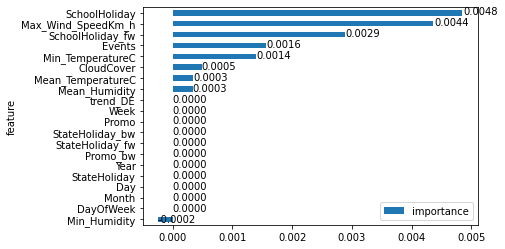

In [0]:
res = PermutationImportance(learn, train_df.iloc[:1000], bs=64)

In [0]:
res.importance

{'AfterStateHoliday': -0.001553551199172124,
 'Assortment': -0.07919486629651797,
 'BeforeStateHoliday': -0.005201604262893468,
 'CloudCover': 0.00048355000526950506,
 'CompetitionDistance': -0.019016574246159386,
 'CompetitionMonthsOpen': -0.10841693568364925,
 'CompetitionOpenSinceYear': -0.016683214079184133,
 'Day': 0.0,
 'DayOfWeek': 0.0,
 'Events': 0.001559851271622957,
 'Max_Humidity': -0.009709267212128494,
 'Max_TemperatureC': -0.009958158963272522,
 'Max_Wind_SpeedKm_h': 0.004356072317053868,
 'Mean_Humidity': 0.00033647053607783155,
 'Mean_TemperatureC': 0.00034557064072903505,
 'Mean_Wind_SpeedKm_h': -0.019977296405575332,
 'Min_Humidity': -0.0002463250549603543,
 'Min_TemperatureC': 0.0013973716253292468,
 'Month': 0.0,
 'Promo': 0.0,
 'Promo2SinceYear': -0.020822906130087162,
 'Promo2Weeks': -0.13944067023437437,
 'PromoInterval': -0.03426368292124248,
 'Promo_bw': 0.0,
 'Promo_fw': -0.028156268241529222,
 'SchoolHoliday': 0.004849966885730297,
 'SchoolHoliday_bw': -0.037